1.

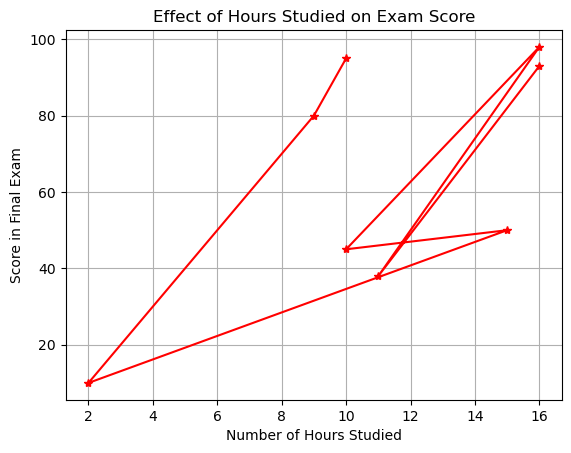

In [1]:
import matplotlib.pyplot as plt
hours = [10,9,2,15,10,16,11,16]
score = [95,80,10,50,45,98,38,93]
# Plotting the line chart
plt.plot(hours, score, marker='*', color='red', linestyle='-')
# Adding labels and title
plt.xlabel('Number of Hours Studied')
plt.ylabel('Score in Final Exam')
plt.title('Effect of Hours Studied on Exam Score')
# Displaying the plot
plt.grid(True)
plt.show()

2

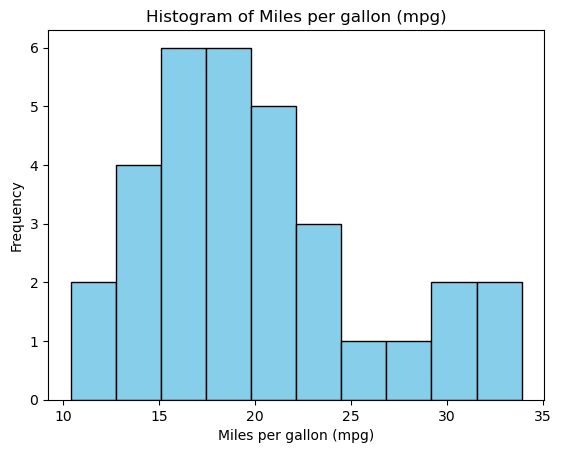

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
mtcars = pd.read_csv(r"C:\Users\sagar\Downloads\mtcars.csv") # Replace 'path_to_your_mtcars.csv' with the actual path to

# Plotting the histogram
plt.hist(mtcars['mpg'], bins=10, color='skyblue', edgecolor='black')
# Adding labels and title
plt.xlabel('Miles per gallon (mpg)')
plt.ylabel('Frequency')
plt.title('Histogram of Miles per gallon (mpg)')
# Displaying the plot
plt.show()

3

In [6]:
import pandas as pd
import numpy as np

# Import the data into a DataFrame
df = pd.read_csv(r"C:\Users\sagar\Downloads\BL-Flickr-Images-Book.csv")

# Display the exact column names
print("Column names in the DataFrame:")
print(df.columns)


print("Original DataFrame:")
print(df.head())

# Find and drop the columns which are irrelevant for the book information
irrelevant_columns = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver', 'Contributors', 'Issuance type', 'Shelfmarks']
df.drop(columns=irrelevant_columns, inplace=True)

# Change the Index of the DataFrame
df.set_index('Identifier', inplace=True)


# Tidy up fields in the data such as date of publication with the help of simple regular expression
df['Date of Publication'] = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
# Combine str methods with NumPy to clean columns
df['Place of Publication'] = np.where(df['Place of Publication'].str.contains('London'), 'London', df['Place of Publication'].str.replace('-', ' '))

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Column names in the DataFrame:
Index(['Identifier', 'Edition Statement', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate Author', 'Corporate Contributors', 'Former owner',
       'Engraver', 'Issuance type', 'Flickr URL', 'Shelfmarks'],
      dtype='object')
Original DataFrame:
   Identifier             Edition Statement      Place of Publication  \
0         206                           NaN                    London   
1         216                           NaN  London; Virtue & Yorston   
2         218                           NaN                    London   
3         472                           NaN                    London   
4         480  A new edition, revised, etc.                    London   

  Date of Publication              Publisher  \
0         1879 [1878]       S. Tinsley & Co.   
1                1868           Virtue & Co.   
2                1869  Bradbury, Evans & Co.   
3                1

4. logistic regression 

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline with StandardScaler and LogisticRegression with regularization
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=1e4, max_iter=1000))
# Train the model
pipeline.fit(X_train, y_train)
# Calculate the accuracy on the testing set
accuracy = pipeline.score(X_test, y_test)
print("Classification accuracy:",  accuracy)

Classification accuracy: 1.0


5. SVM classifier 

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set of hyperparameters to try
hyperparameters = [
{'kernel': 'rbf', 'gamma': 0.5, 'C': 0.01}, {'kernel': 'rbf', 'gamma': 0.5, 'C': 1}, {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}
]
best_accuracy = 0
best_model = None
best_support_vectors = None
# Train SVM models with different hyperparameters and find the best accuracy
for params in hyperparameters:
    model = SVC(kernel=params['kernel'], gamma=params['gamma'], C=params['C'], decision_function_shape='ovr')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    support_vectors = model.n_support_.sum()
    print(f"For hyperparameters: {params}, Accuracy: {accuracy}, Total Support Vectors:{support_vectors}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_support_vectors = support_vectors
print("\nBest accuracy:", best_accuracy)
print("Total support vectors on test data:", best_support_vectors)

For hyperparameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 0.01}, Accuracy: 0.3, Total Support Vectors:120
For hyperparameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 1}, Accuracy: 1.0, Total Support Vectors:39
For hyperparameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}, Accuracy: 1.0, Total Support Vectors:31

Best accuracy: 1.0
Total support vectors on test data: 39


6. Decision Tree 

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from io import StringIO
from IPython.display import Image
import pydotplus
# Define the dataset
data = {
'Price': ['Low', 'Low', 'Low', 'Low', 'Low', 'Med', 'Med', 'Med', 'Med', 'High', 'High', 'High', 'High'],
'Maintenance': ['Low', 'Med', 'Low', 'Med', 'High', 'Med', 'Med', 'High', 'High', 'Med', 'Med', 'High',
'High'],
'Capacity': ['2', '4', '4', '4', '4', '4', '4', '2', '5', '4', '2', '2', '5'],
'Airbag': ['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes'],
'Profitable': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)
# Convert categorical variables into numerical ones
df = pd.get_dummies(df, columns=['Price', 'Maintenance', 'Airbag'])
# Separate features and target variable
X = df.drop('Profitable', axis=1)
y = df['Profitable']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
# Train the classifier on the training data
clf.fit(X_train, y_train)
# Predict on the testing data
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


Accuracy: 0.3333333333333333


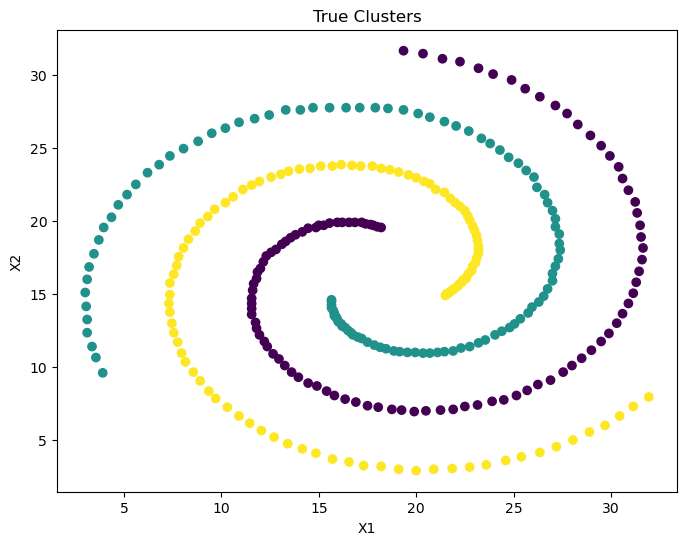

AttributeError: 'NoneType' object has no attribute 'split'

In [16]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt("Spiral.txt", delimiter="\t", skiprows=1)

X = data[:, :2] # Features
y_true = data[:, 2] # Actual cluster labels

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title('True Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X)

# Single-link Hierarchical Clustering
single_link = AgglomerativeClustering(n_clusters=3, linkage='single')
single_link_clusters = single_link.fit_predict(X)

# Complete-link Hierarchical Clustering
complete_link = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_link_clusters = complete_link.fit_predict(X)

# Compute the Rand Index
rand_index_kmeans = adjusted_rand_score(y_true, kmeans_clusters)
rand_index_single_link = adjusted_rand_score(y_true, single_link_clusters)
rand_index_complete_link = adjusted_rand_score(y_true, complete_link_clusters)

print("Rand Index for K-means Clustering:", rand_index_kmeans)
print("Rand Index for Single-link Hierarchical Clustering:", rand_index_single_link)
print("Rand Index for Complete-link Hierarchical Clustering:", rand_index_complete_link)
